# Endless halfbetting

In [1]:
from roulette import Roulette
from core import *
from simulations_core import get_mean_and_std_of_histories
import matplotlib.pyplot as plt  
roulette = Roulette()

In [2]:
def endless_half_betting(starting_money, bet_amount):
    money = starting_money
    money_points = [money]

    while money != 0:
        if money - bet_amount >= 0:
            money += roulette.make_even_bet(bet_amount)
        else:
            money += roulette.make_even_bet(money)
        money_points.append(money)

    return money_points

In [3]:
money_histories = dict()
for i in range(10, 110, 10):
    money_histories[i] = []

for bet_percentage in range(10, 110, 10):
    for _ in range (1000):
        money_histories[bet_percentage].append(endless_half_betting(100, bet_percentage))

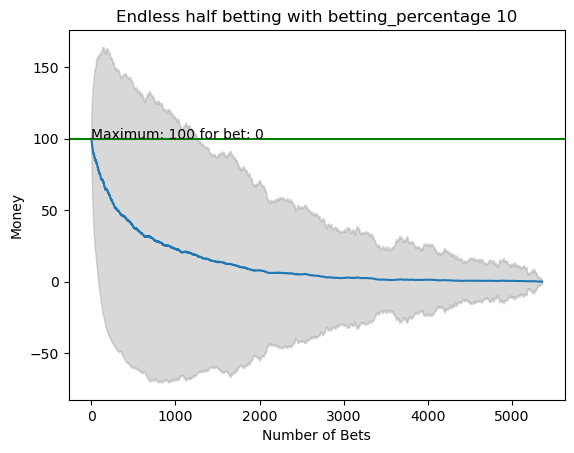

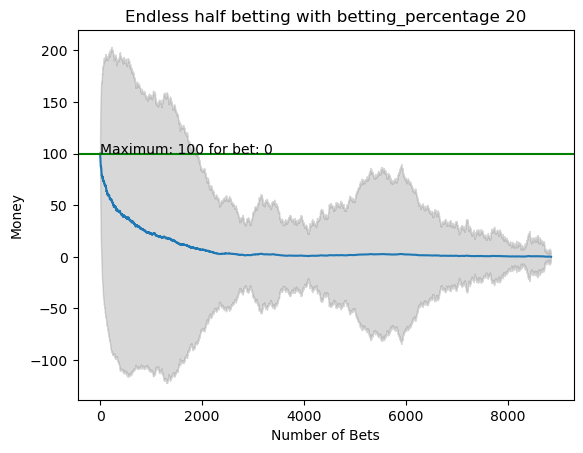

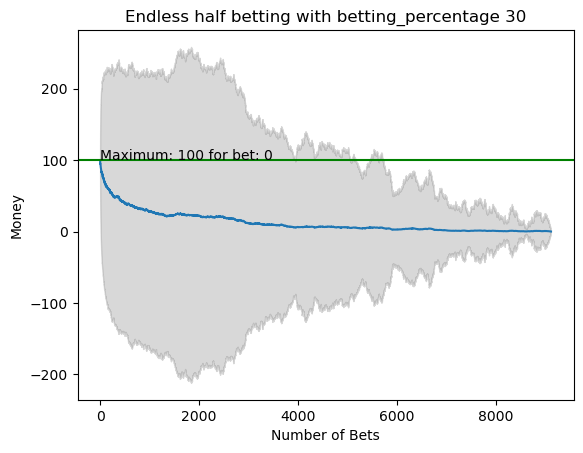

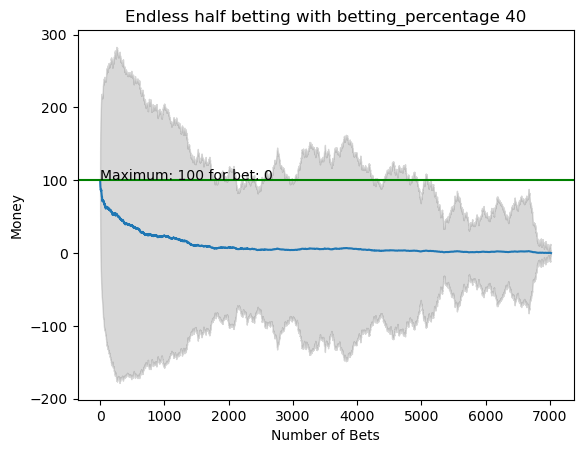

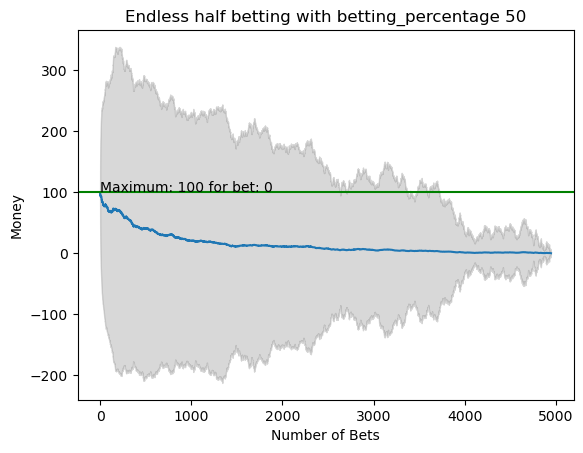

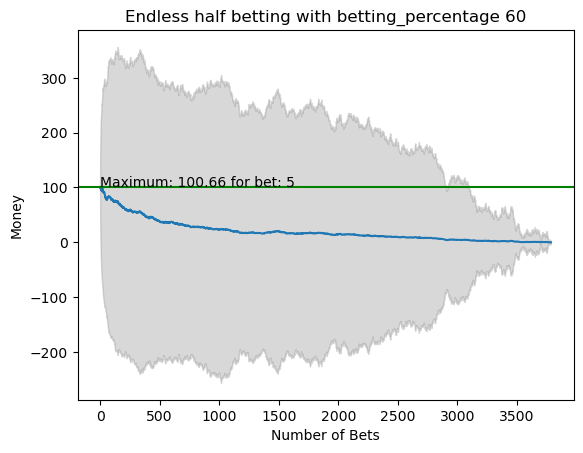

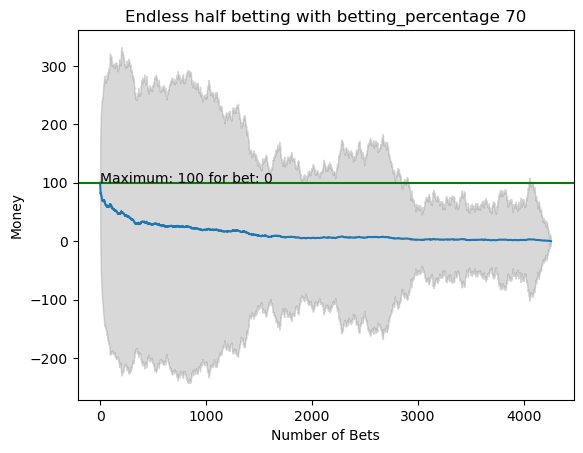

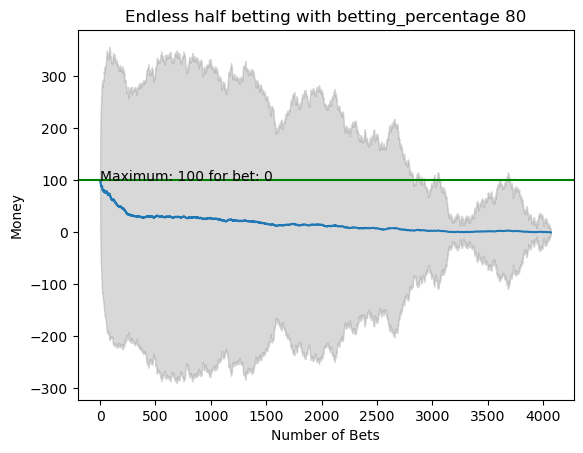

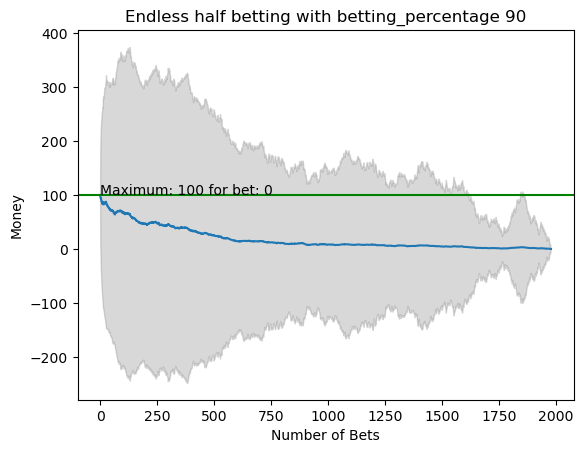

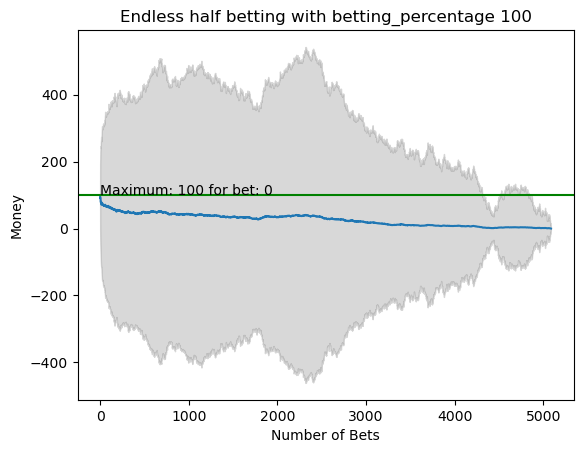

In [4]:
for i in range(10, 110, 10):
    mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, i)
    plot_money_history(mean_money_list, std_dev=std_money_list, title=f'Endless half betting with betting_percentage {i}', maximum_line=True)

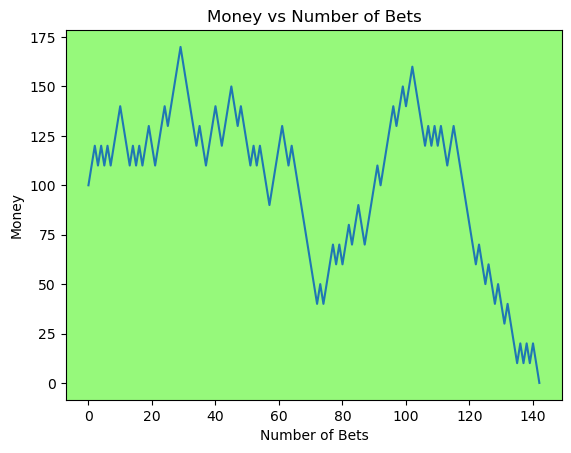

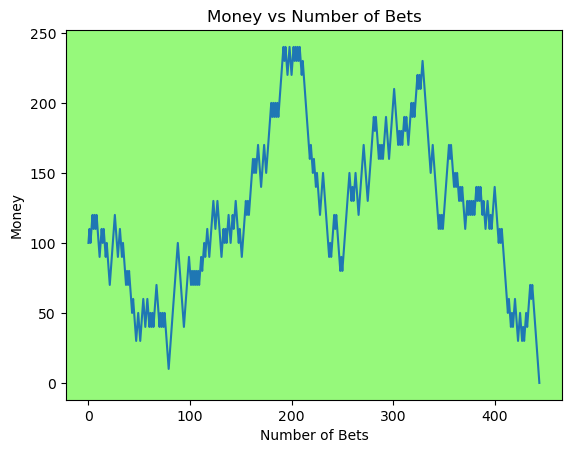

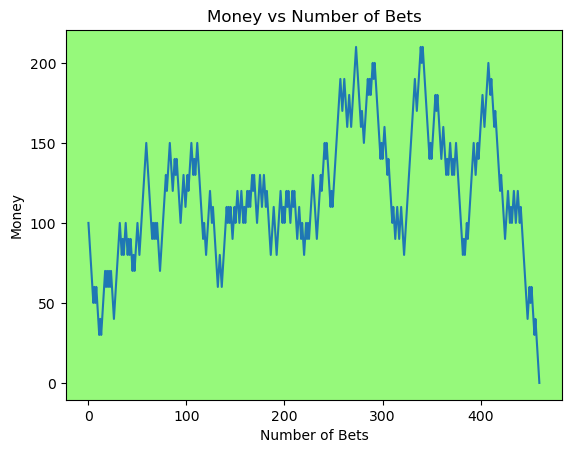

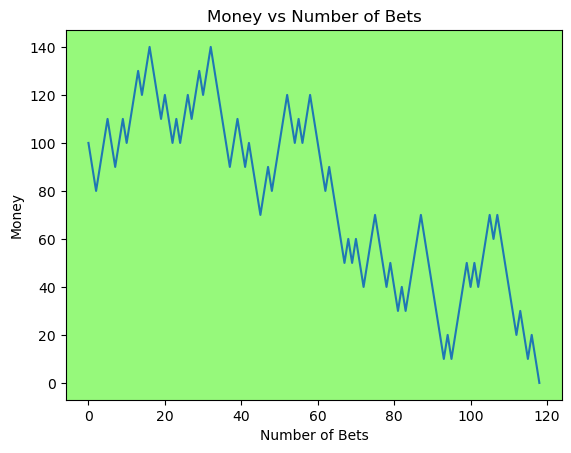

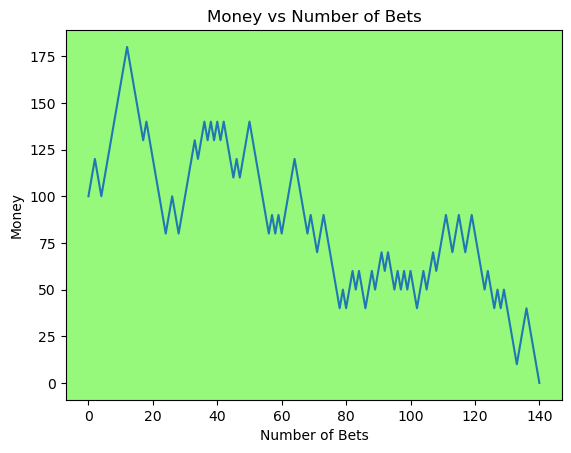

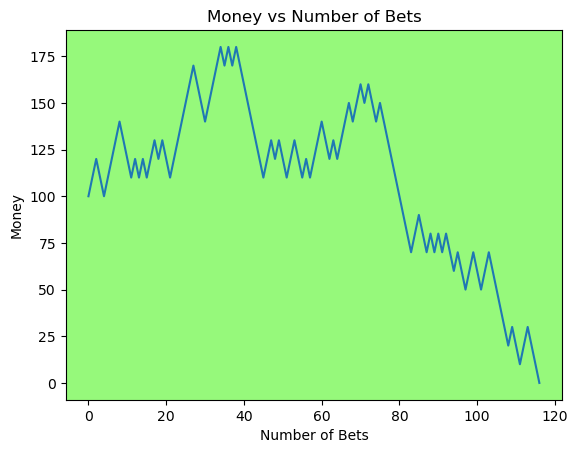

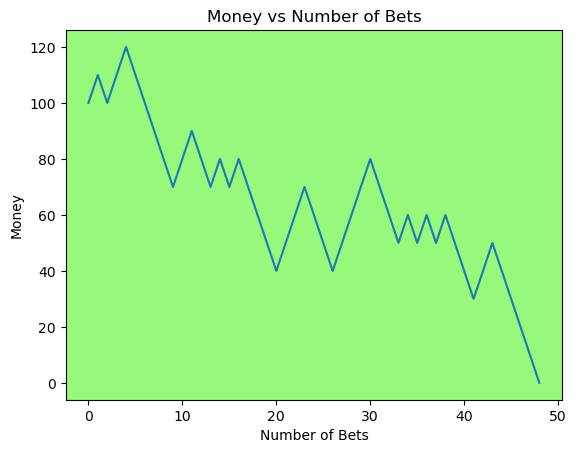

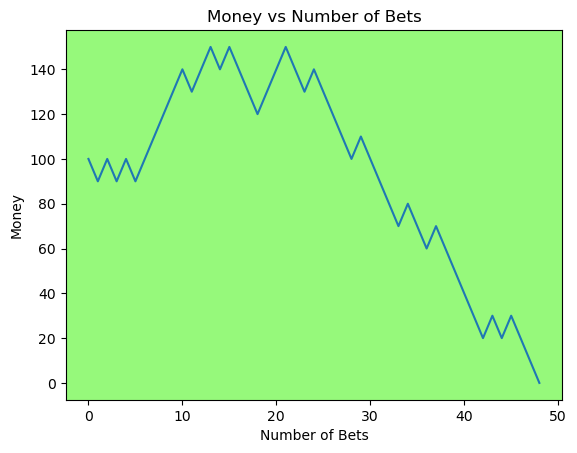

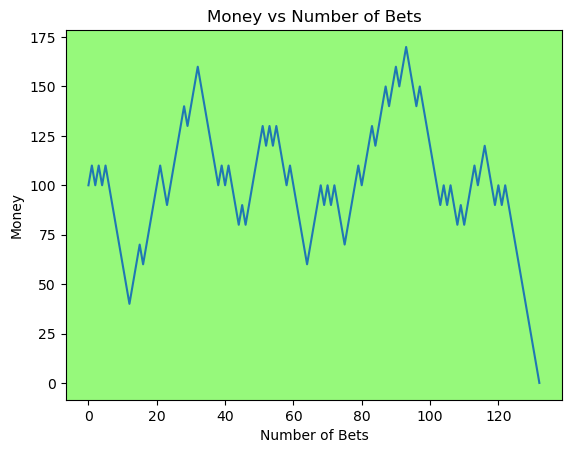

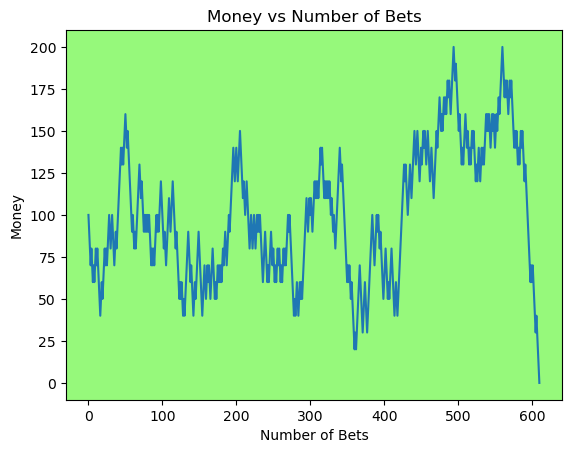

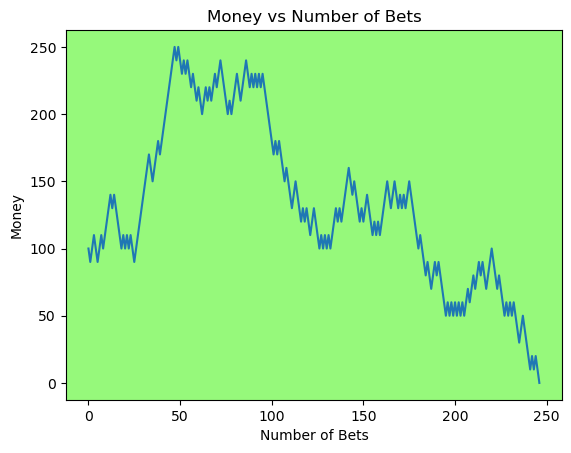

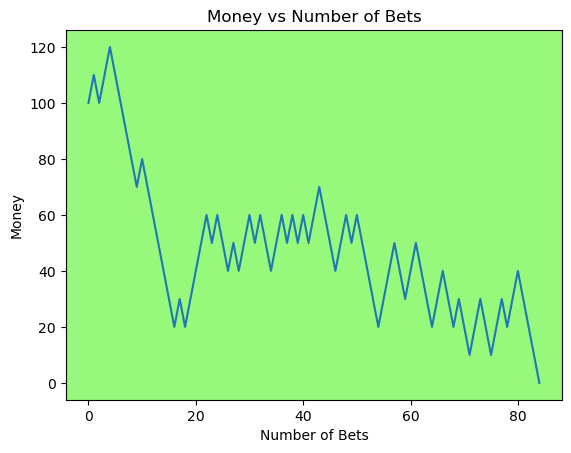

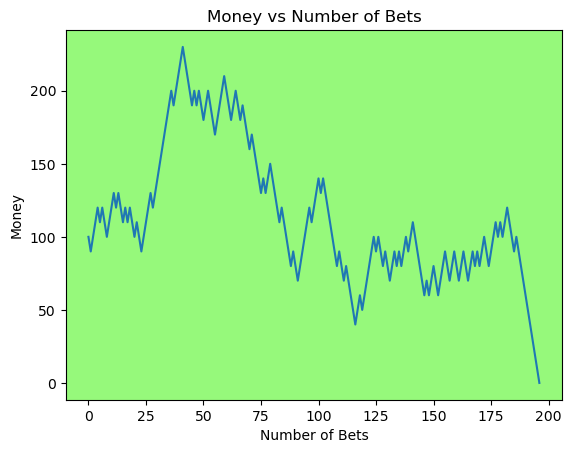

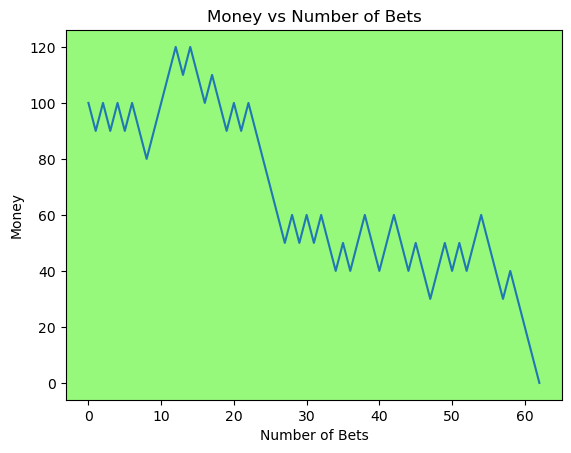

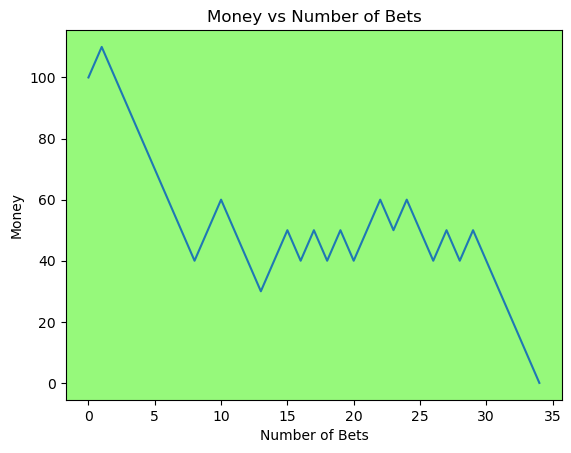

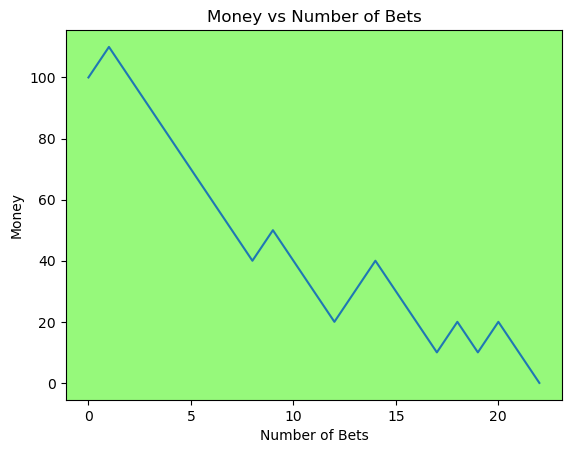

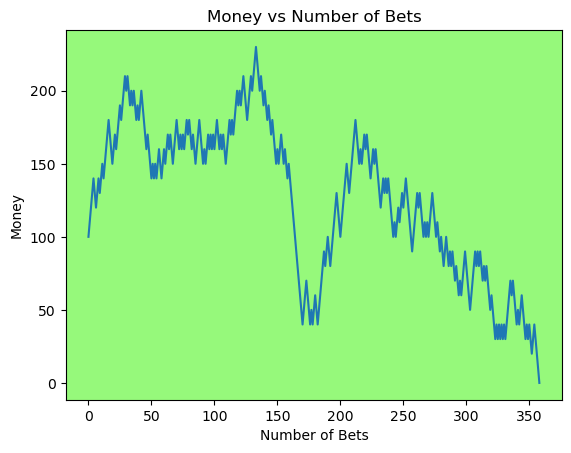

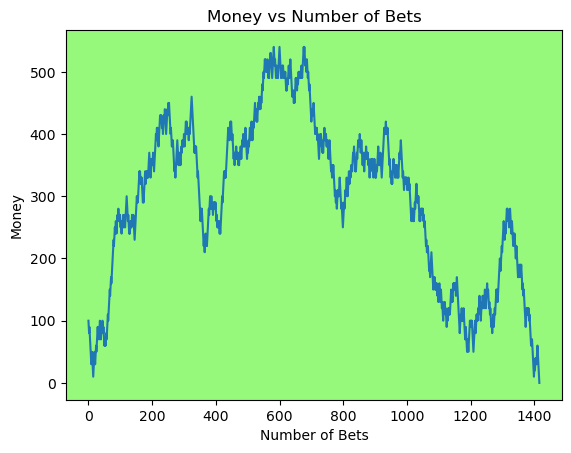

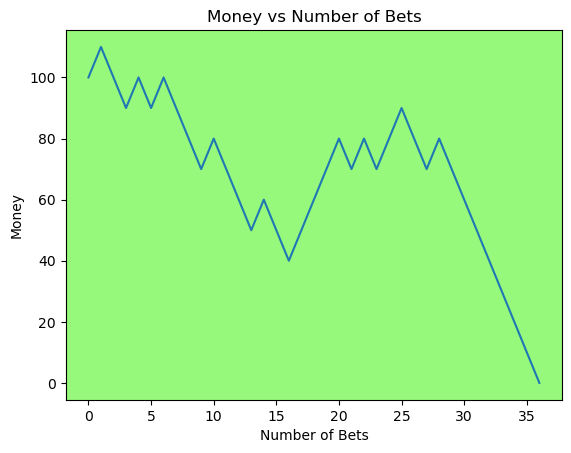

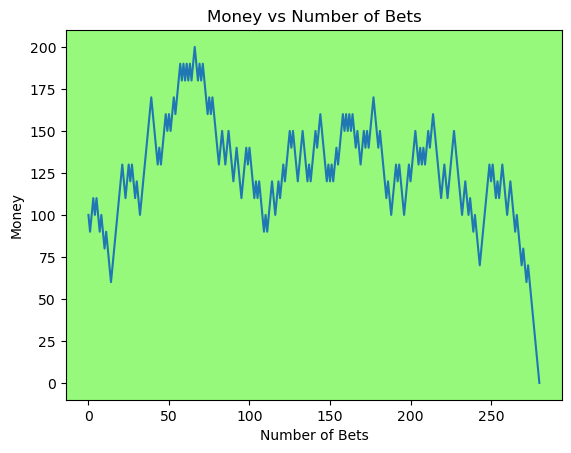

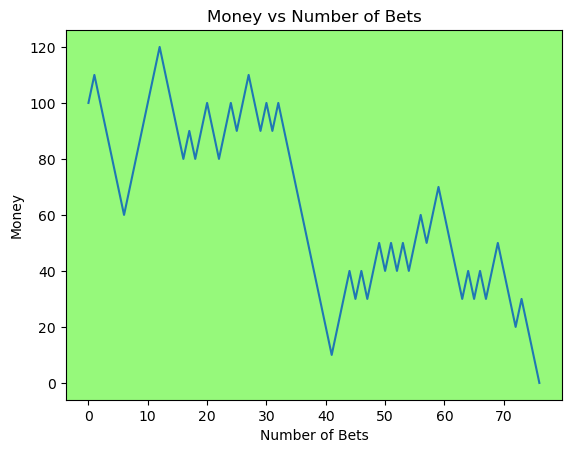

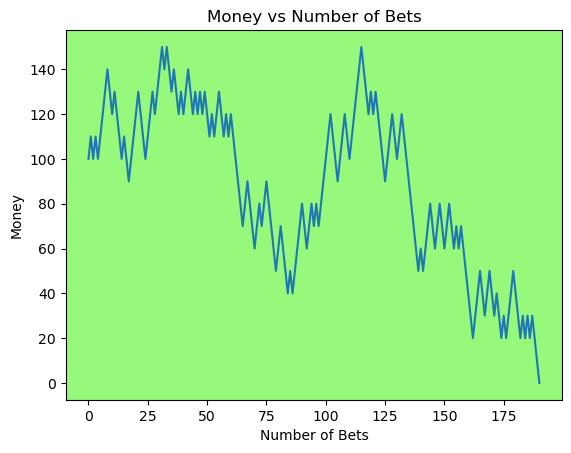

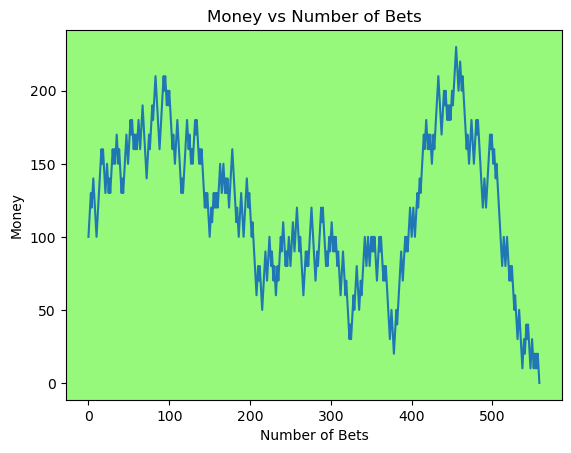

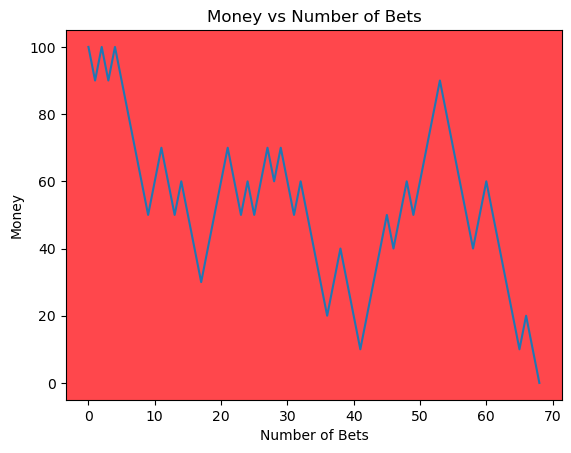

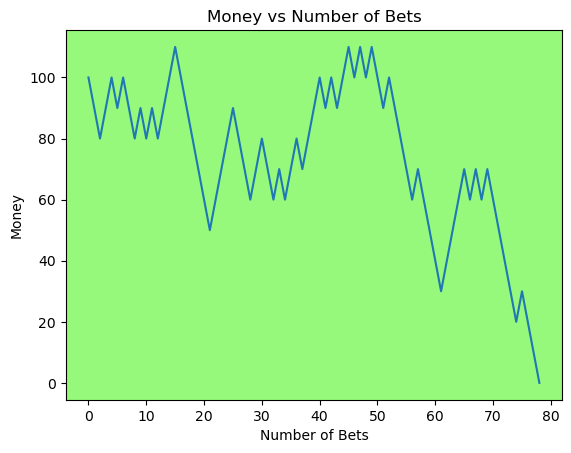

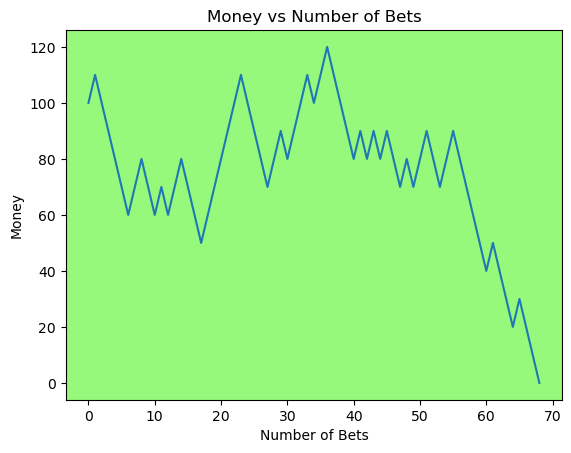

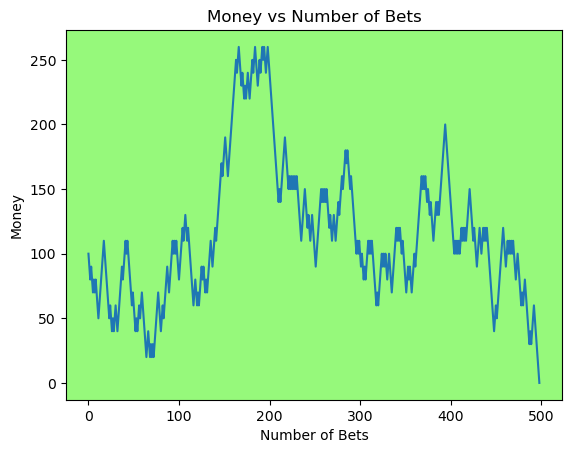

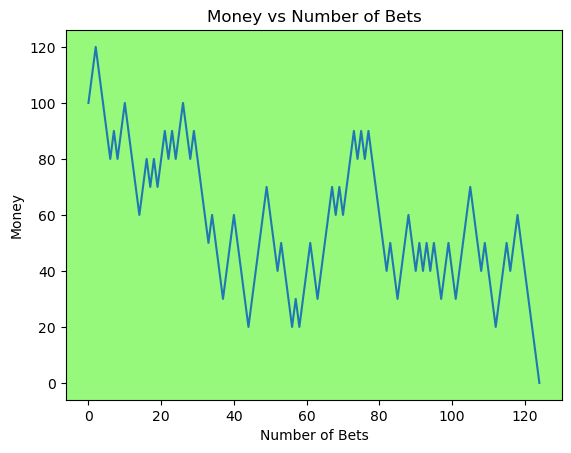

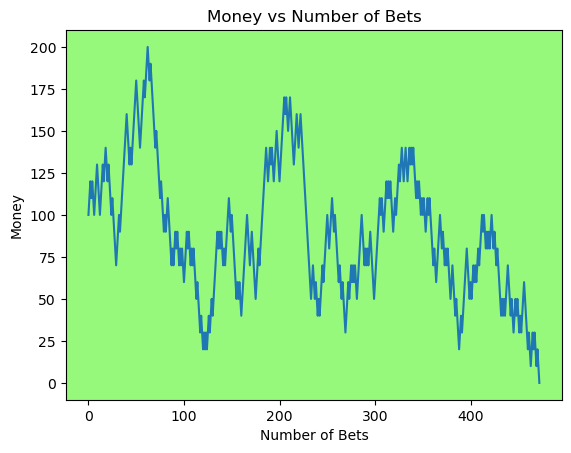

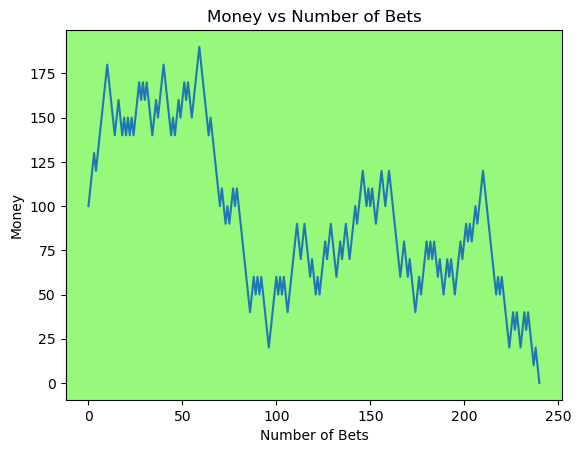

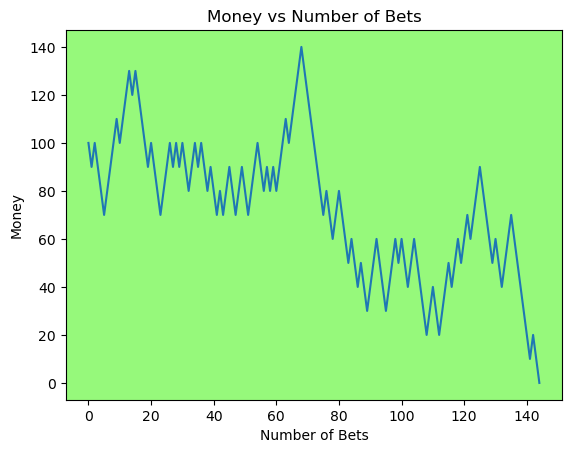

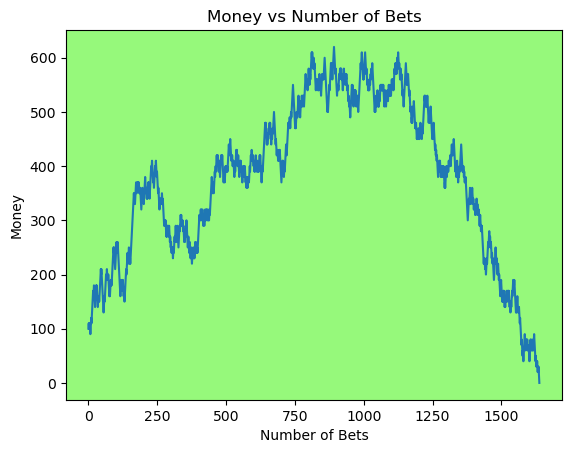

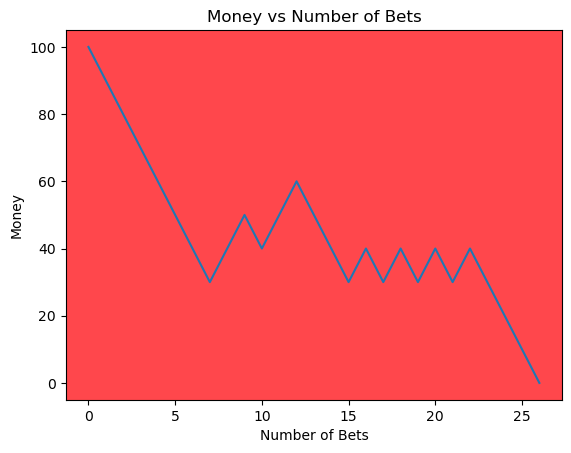

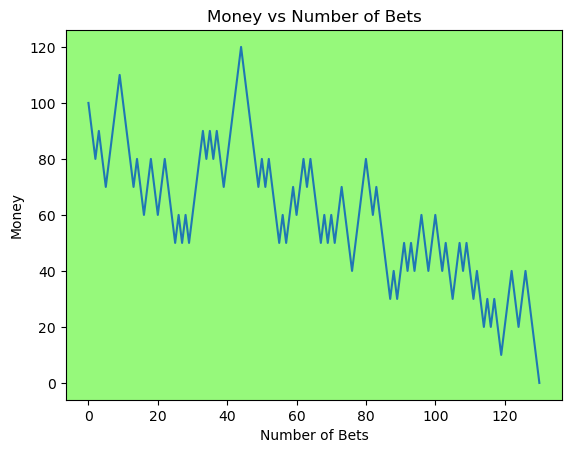

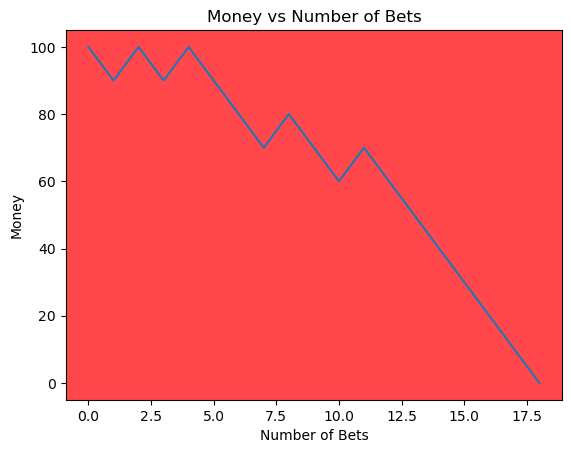

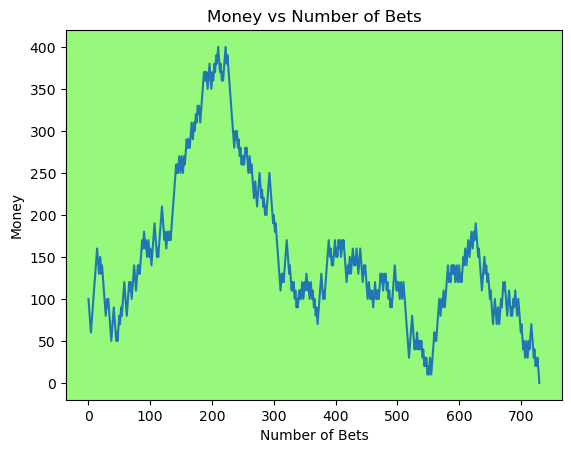

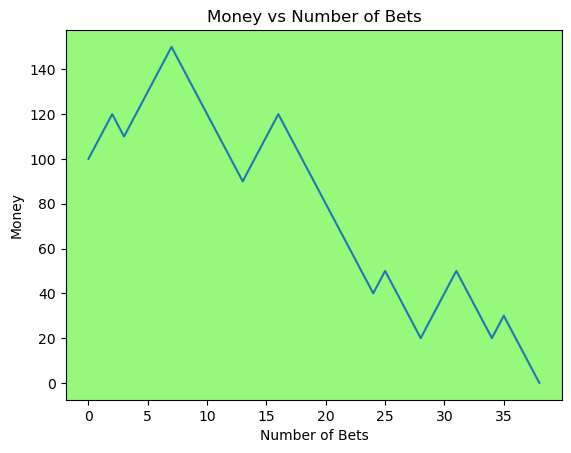

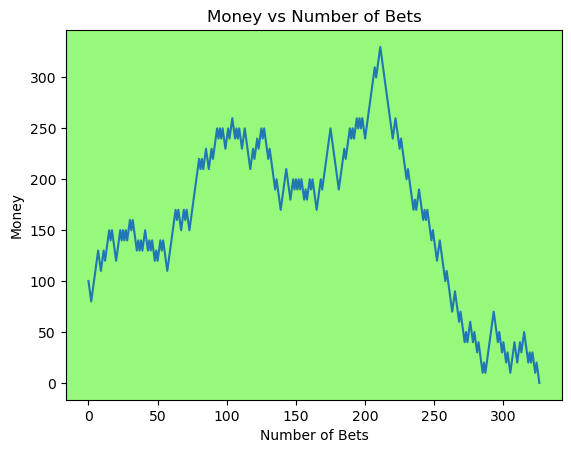

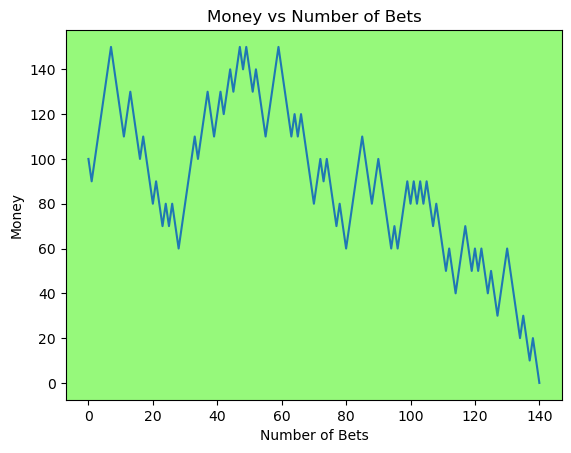

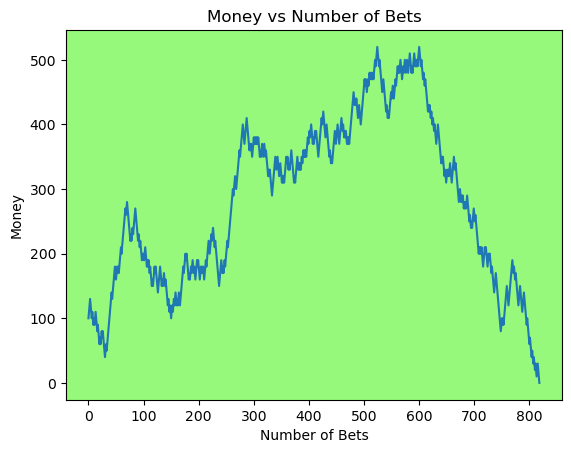

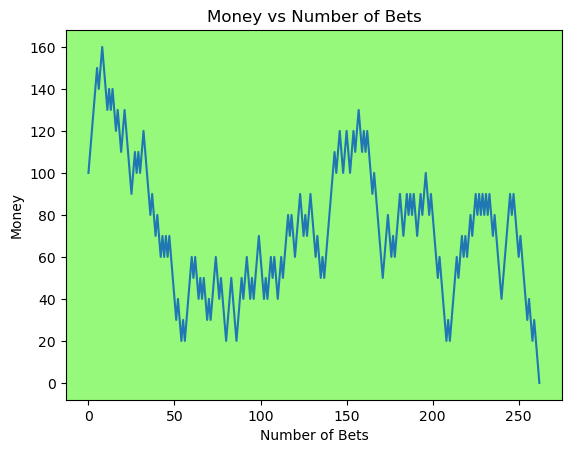

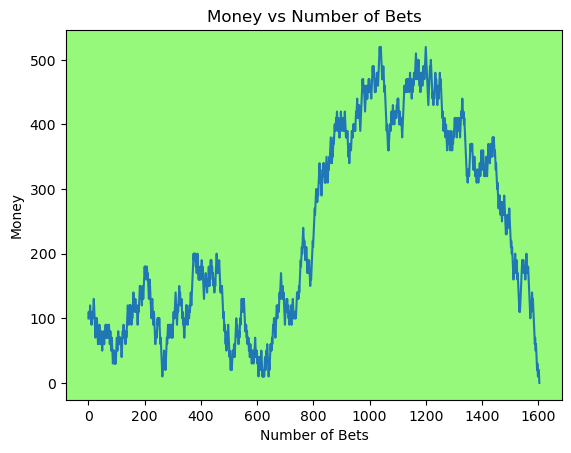

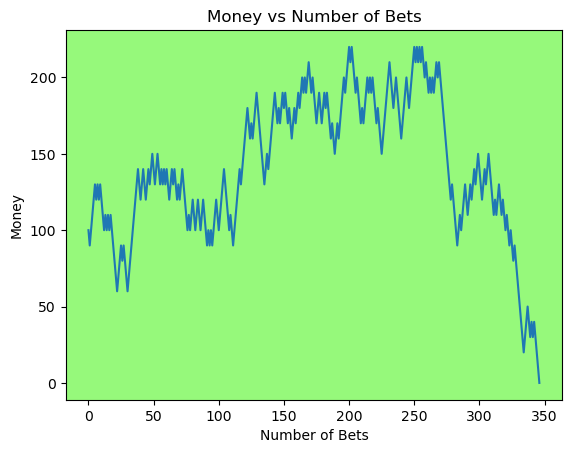

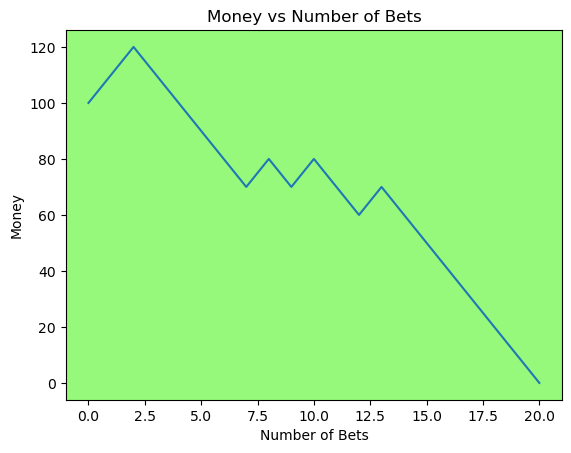

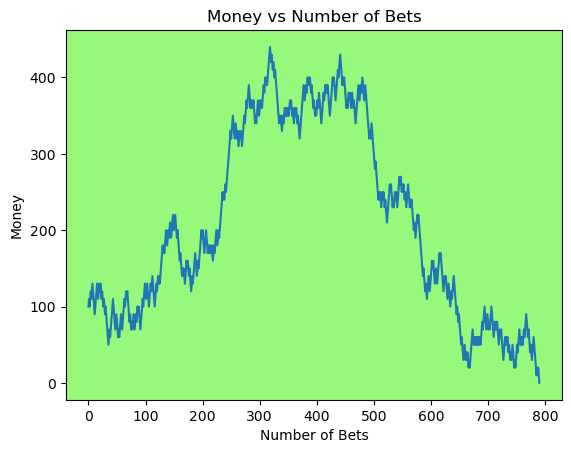

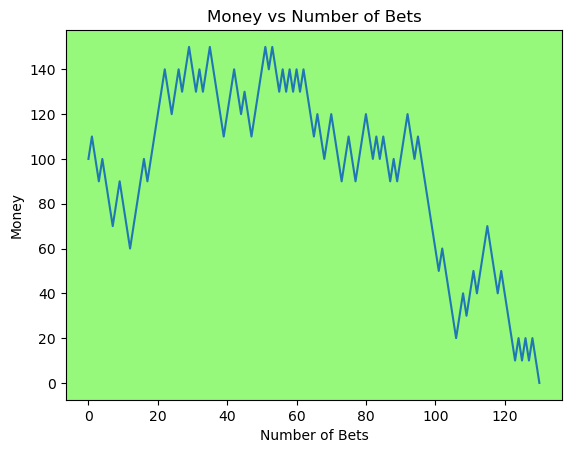

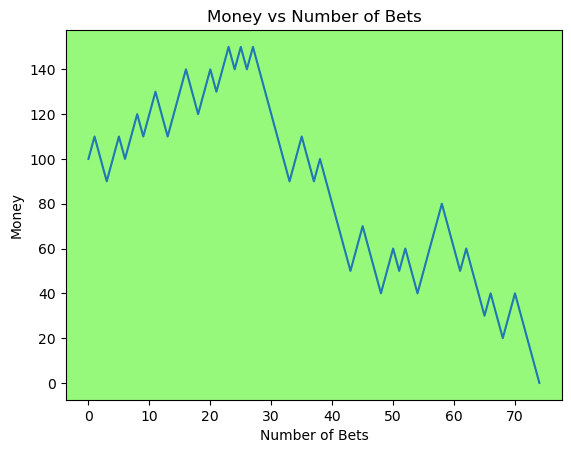

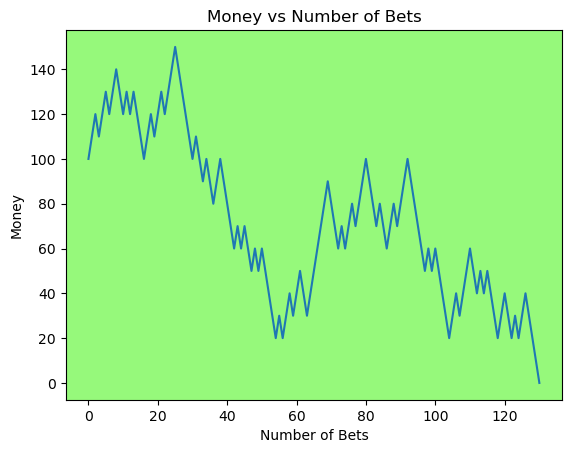

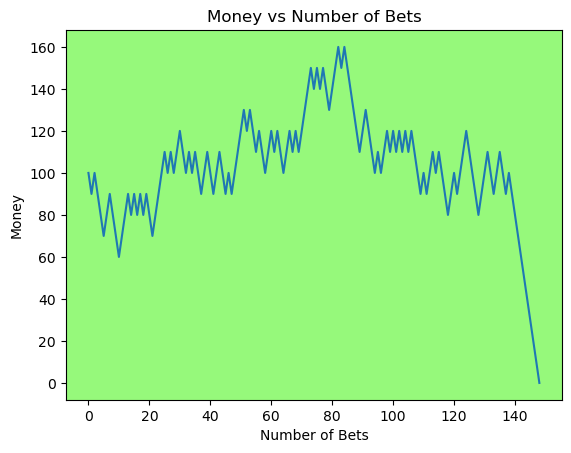

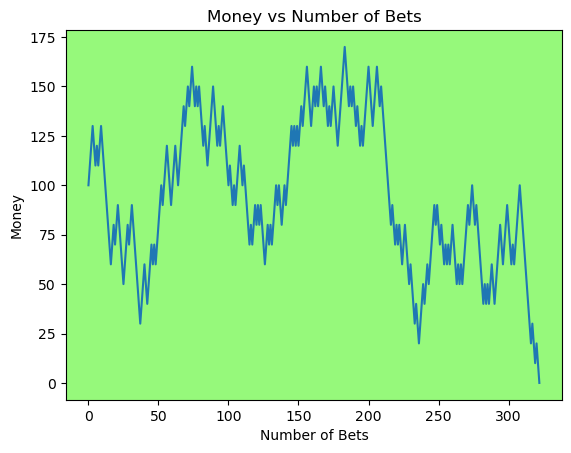

In [5]:
for i in range(50):
    money_history = money_histories[10][i]
    plot_money_history(money_history, change_colors=True)

## Simulating whether there was a gain at some point
What is checked is whether there was a point where the balance was greater than the initial balance. 

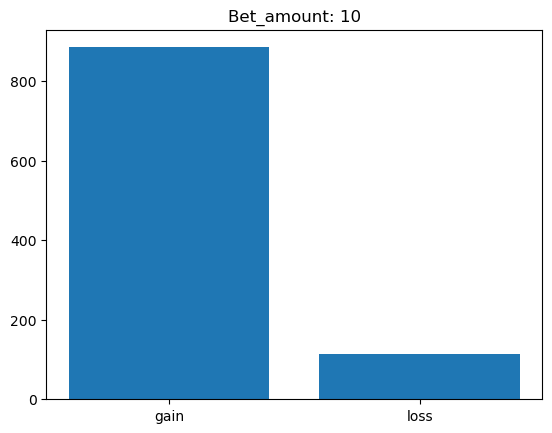

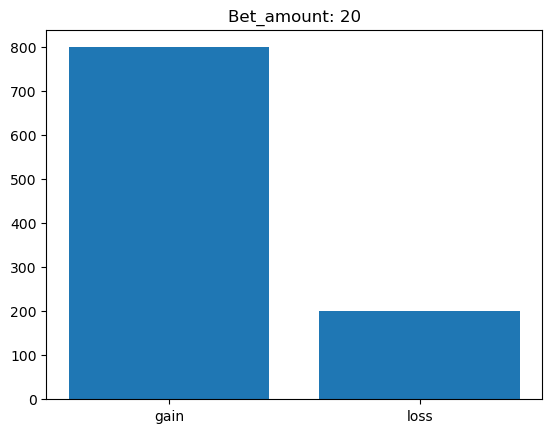

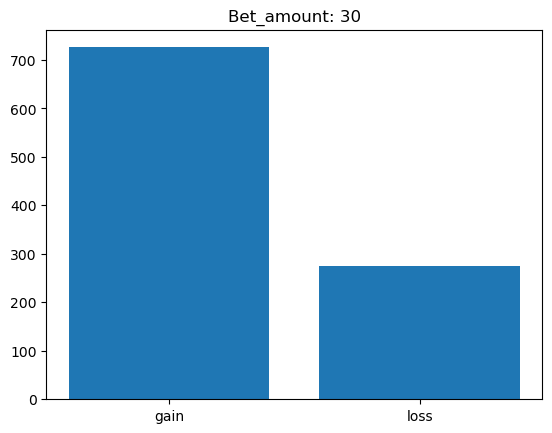

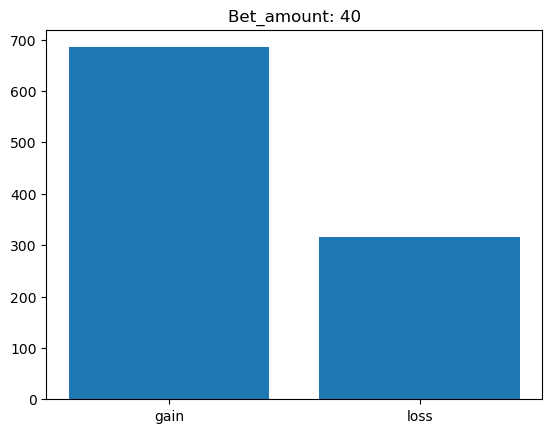

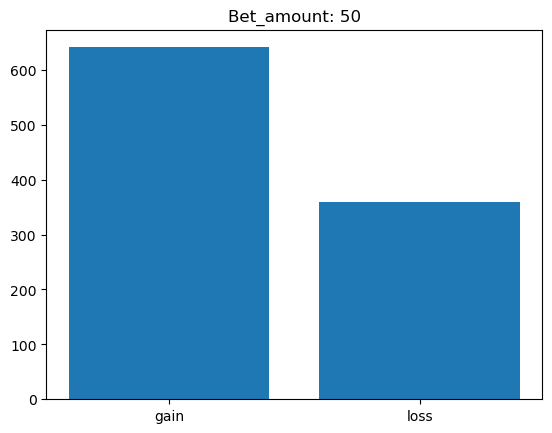

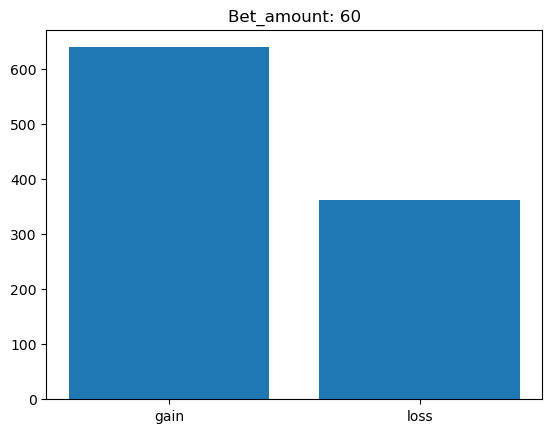

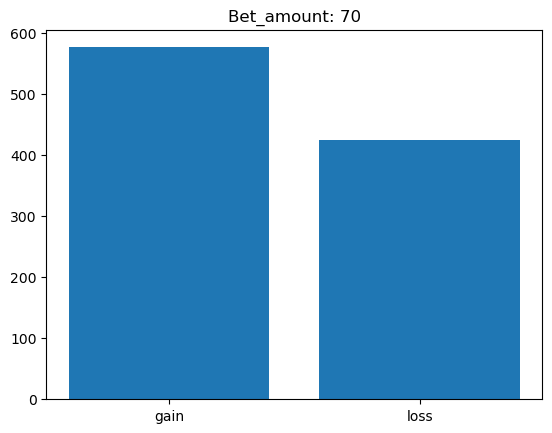

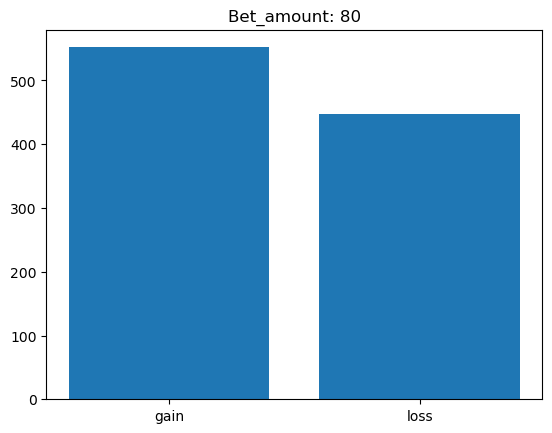

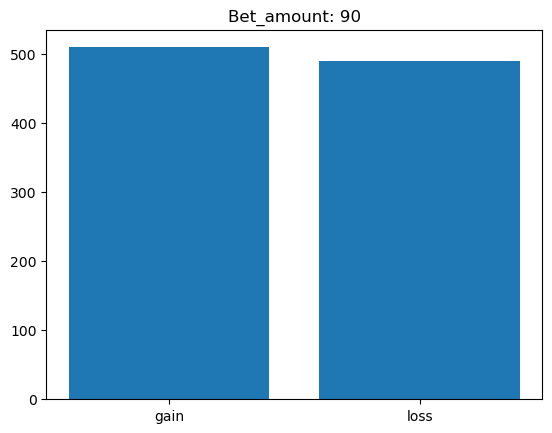

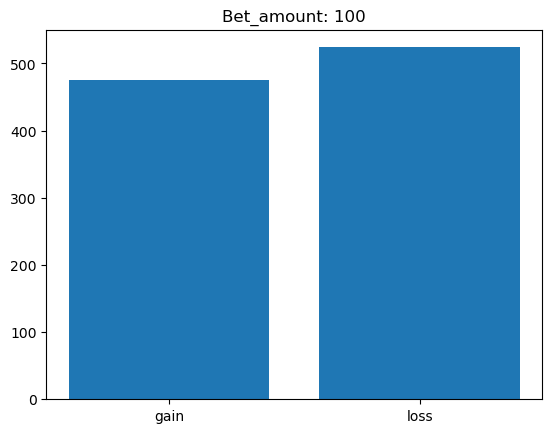

In [6]:
for bet_amount in range(10, 110, 10):
    gain, loss = 0, 0
    for money_history in money_histories[bet_amount]:
        if gain_at_some_point(money_history):
            gain += 1
        else:
            loss += 1
        
    plt.bar(['gain', 'loss'], [gain, loss])
    plt.title(f'Bet_amount: {bet_amount}')
    plt.show()

## Simulating how many bets are needed for bankruptcy, depending on the percentage of the initial balance that is bet

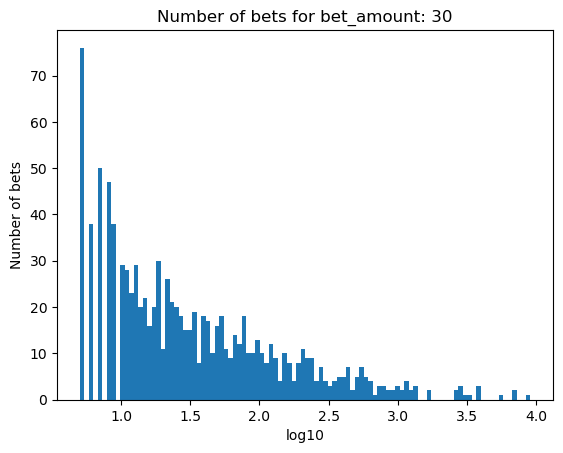

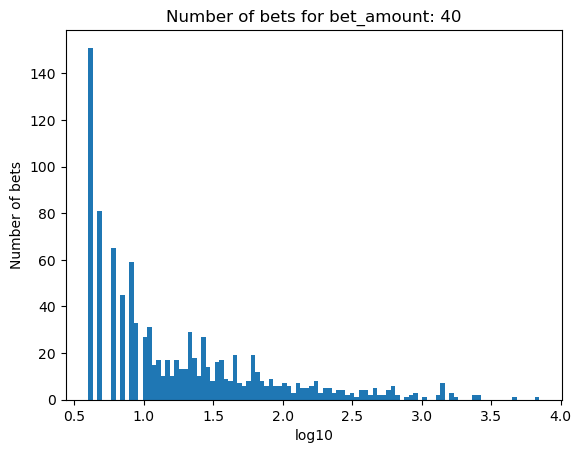

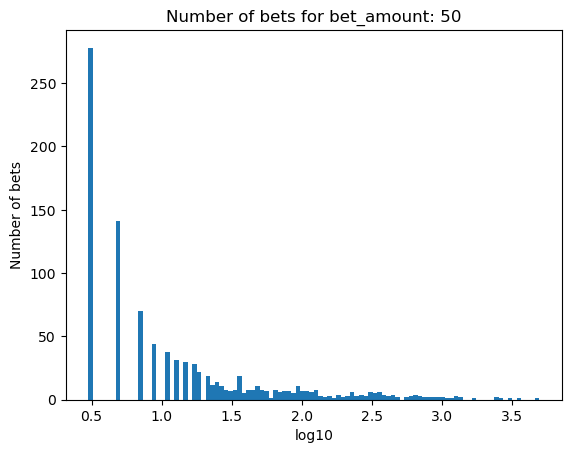

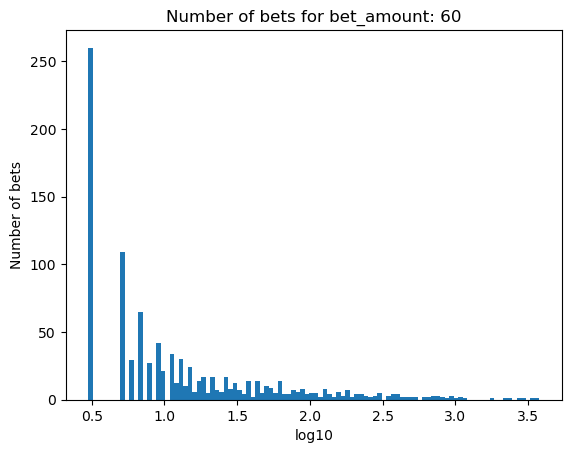

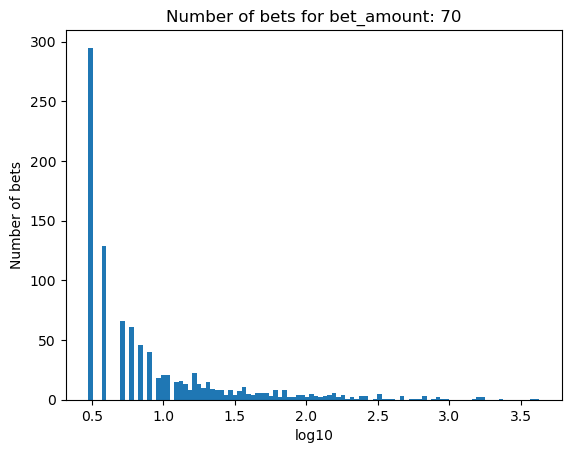

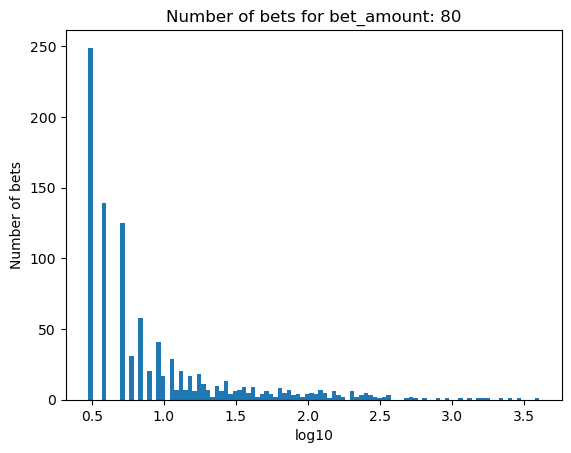

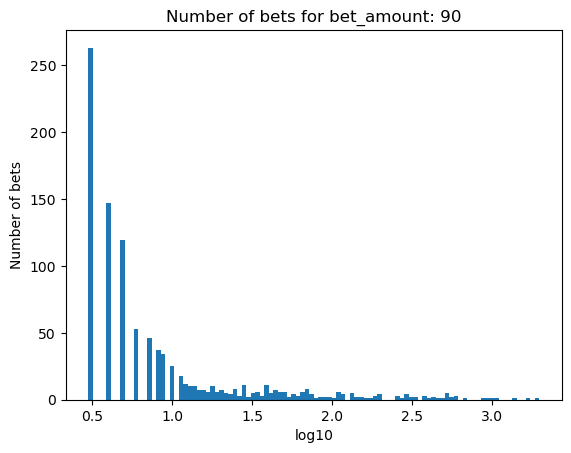

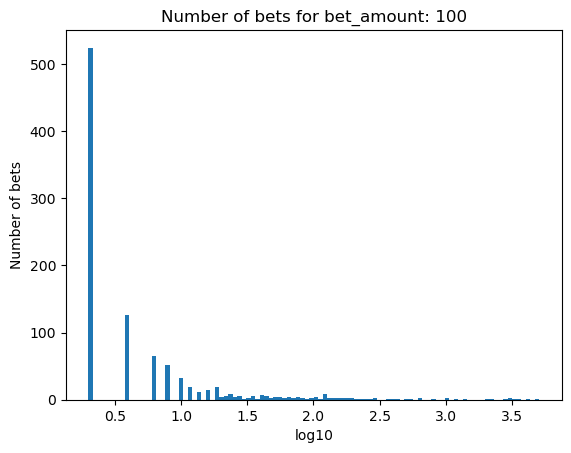

In [7]:
for bet_amount in range(30, 110, 10):
    plot_number_of_bets(money_histories[bet_amount], f'Number of bets for bet_amount: {bet_amount}')